In [1]:
import tensorflow as tf
print("GPUs available:", tf.config.list_physical_devices('GPU'))

GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU, AveragePooling2D, Activation
import matplotlib.pyplot as plt

In [6]:
# Define image parameters
img_height, img_width = 128, 128
batch_size = 32


# Define paths to your dataset directories
train_dir = '/Users/milind/Documents/try/Untitled Folder/Combined_ao/Train'      # Replace with your training data directory
validation_dir = '/Users/milind/Documents/try/Untitled Folder/Combined_ao/Test'  # Replace with your validation data directory


# Create ImageDataGenerators for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    rotation_range=40,        # Randomly rotate images   ##********** causing permission error
    width_shift_range=0.2,    # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    shear_range=0.2,          # Random shear
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Randomly flip images
    fill_mode='nearest'       # Fill strategy for new pixels
)

# For validation data, only rescaling is applied
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create generators that read images from the directories
train_generator_all = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 8733 images belonging to 4 classes.
Found 2570 images belonging to 4 classes.


### 16+16 2 conv layed 1 max pooling ----- 32+32 and 1 pool ----- 64+64 and 1 pool === fully connected layer 
## kernal = (3,3) and Pooling = (2,2)

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
2025-04-06 21:22:59.493212: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-04-06 21:22:59.493577: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-06 21:22:59.495121: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-06 21:22:59.495200: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not ide

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281,044 (4.89 MB)

 Trainable params: 1,281,044 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


2025-04-06 21:23:02.445857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.3775 - loss: 1.2812

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


272/272 ━━━━━━━━━━━━━━━━━━━━ 79s 257ms/step - accuracy: 0.3777 - loss: 1.2807 - val_accuracy: 0.5715 - val_loss: 0.8694
Epoch 2/30
  1/272 ━━━━━━━━━━━━━━━━━━━━ 49s 183ms/step - accuracy: 0.3750 - loss: 1.1174

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


272/272 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.3750 - loss: 1.1174 - val_accuracy: 0.6016 - val_loss: 0.8807
Epoch 3/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 63s 232ms/step - accuracy: 0.6348 - loss: 0.8504 - val_accuracy: 0.7848 - val_loss: 0.5240
Epoch 4/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.7188 - loss: 0.4932 - val_accuracy: 0.7641 - val_loss: 0.5799
Epoch 5/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 77s 282ms/step - accuracy: 0.7746 - loss: 0.6053 - val_accuracy: 0.8289 - val_loss: 0.4526
Epoch 6/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7812 - loss: 0.6768 - val_accuracy: 0.8293 - val_loss: 0.4445
Epoch 7/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 83s 303ms/step - accuracy: 0.8075 - loss: 0.5167 - val_accuracy: 0.8168 - val_loss: 0.4541
Epoch 8/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.7188 - loss: 0.9551 - val_accuracy: 0.8340 - val_loss: 0.4098
Epoch 9/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 98s 361ms/step - accuracy: 0.7883 - loss: 0.5616 - val_accurac

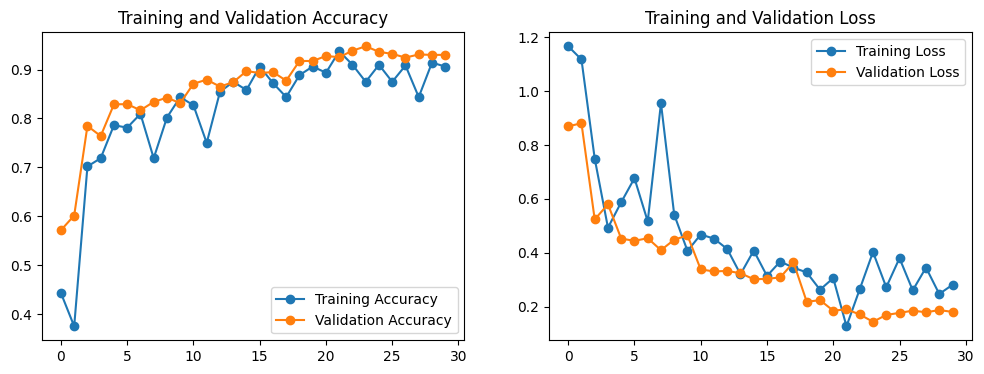

In [8]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=30,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()